# $$\color{red}{\text{Machine Learning}}$$

$$\color{orange}{\text{Binary Image Classifier}}$$

$$\color{lime}{\text{Alireza Javid - 810198375}}$$

In [1]:
import cv2
import os
import numpy as np

images=[]
for filename in os.listdir("Data\image"):
    images.append(cv2.mean(cv2.imread(os.path.join("Data\image",filename))))
real_label = []
for filename in os.listdir("Data\image"):
    if (filename[0] == 's'):
        real_label.append('Sea')
    else:
        real_label.append('Jungle')

pred_label = []
for i in range(len(images)):
    if images[i][0] > images[i][1]:
        pred_label.append('Sea')
    else:
        pred_label.append('Jungle')

In [2]:
TP=FN=FP=TN=0
misclass_index = []
for i in range (len(images)):
    if (pred_label[i] == "Sea" and real_label[i] == "Sea"):
        TP+=1
    elif(pred_label[i] == "Jungle" and real_label[i] == "Sea"):
        FN+=1
        misclass_index.append(i)
    elif(pred_label[i] == "Sea" and real_label[i] == "Jungle"):
        FP+=1
        misclass_index.append(i)
    else:
        TN+=1


Confusion_Matrix=[[TP,FN],[FP,TN]]
print("Confusion Matrix = ", Confusion_Matrix)
print("accuracy = ", (TP+TN)/(TP+TN+FP+FN))
print("precision = ", TP/(TP+FP))
print("recall = ", TP/(TP+FN))

Confusion Matrix =  [[39, 1], [2, 40]]
accuracy =  0.9634146341463414
precision =  0.9512195121951219
recall =  0.975


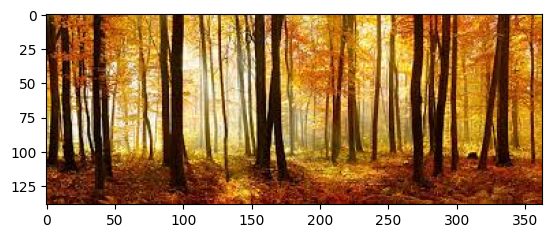

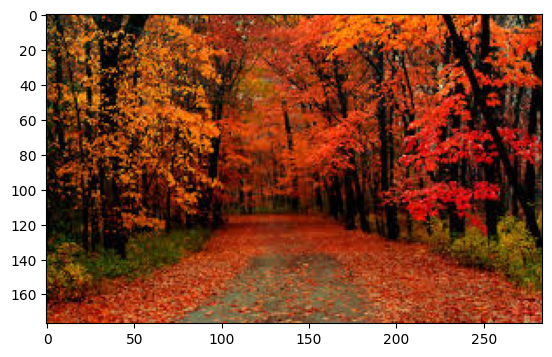

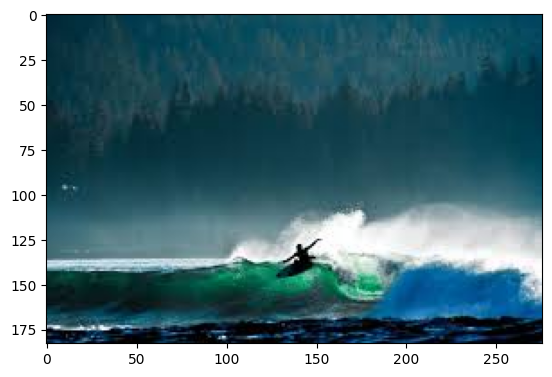

In [6]:
import matplotlib.pyplot as plt
for index in misclass_index:
    if index <= 45:
        filename = "j" + str(index) + ".jpg"
    else:
        filename = "s" + str(index % 45) + ".jpg"
    img_color = cv2.imread(os.path.join("Data\image",filename))
    img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
    plt.imshow(img_color)
    plt.show()